In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-campaigns-dataset/bank-additional-full.csv


# Libraries

In [2]:
import time

# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import special, stats

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score


# SMOTe
from imblearn.over_sampling import SMOTE

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, average_precision_score, precision_recall_curve 
from sklearn.metrics import recall_score, roc_curve, roc_auc_score, precision_recall_curve, auc, plot_confusion_matrix

# ensemble
from xgboost import XGBClassifier

# warnings
import warnings
warnings.filterwarnings("ignore")

# style
import matplotlib.style as style
style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('/kaggle/input/bank-marketing-campaigns-dataset/bank-additional-full.csv', sep=';')

In [4]:
df.shape

(41188, 21)

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Dictionary

| Input variables:                                         |                                                                                                                                                                                                                                                                                                                                                                                                                              |                                                                |   |
|----------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------|---|
| # bank client data:                                      |                                                                                                                                                                                                                                                                                                                                                                                                                              |                                                                |   |
| 1                                                        | age (numeric)                                                                                                                                                                                                                                                                                                                                                                                                                |                                                                |   |
| 2                                                        | job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')                                                                                                                                                                                                                                           |                                                                |   |
| 3                                                        | marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)                                                                                                                                                                                                                                                                                                  |                                                                |   |
| 4                                                        | education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')                                                                                                                                                                                                                                                                                     |                                                                |   |
| 5                                                        | default: has credit in default? (categorical: 'no','yes','unknown')                                                                                                                                                                                                                                                                                                                                                          |                                                                |   |
| 6                                                        | housing: has housing loan? (categorical: 'no','yes','unknown')                                                                                                                                                                                                                                                                                                                                                               |                                                                |   |
| 7                                                        | loan: has personal loan? (categorical: 'no','yes','unknown')                                                                                                                                                                                                                                                                                                                                                                 |                                                                |   |
| # related with the last contact of the current campaign: |                                                                                                                                                                                                                                                                                                                                                                                                                              |                                                                |   |
| 8                                                        | contact: contact communication type (categorical: 'cellular','telephone')                                                                                                                                                                                                                                                                                                                                                    |                                                                |   |
| 9                                                        | month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                                                                                                                                                                                                                                                                                                      |                                                                |   |
| 10                                                       | day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')                                                                                                                                                                                                                                                                                                                                       |                                                                |   |
| 11                                                       | duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. |                                                                |   |
| # other attributes:                                      |                                                                                                                                                                                                                                                                                                                                                                                                                              |                                                                |   |
| 12                                                       | campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)                                                                                                                                                                                                                                                                                                             |                                                                |   |
| 13                                                       | pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)                                                                                                                                                                                                                                                                   |                                                                |   |
| 14                                                       | previous: number of contacts performed before this campaign and for this client (numeric)                                                                                                                                                                                                                                                                                                                                    |                                                                |   |
| 15                                                       | poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')                                                                                                                                                                                                                                                                                                                        |                                                                |   |
| # social and economic context attributes                 |                                                                                                                                                                                                                                                                                                                                                                                                                              |                                                                |   |
| 16                                                       | emp.var.rate: employment variation rate                                                                                                                                                                                                                                                                                                                                                                                      | quarterly indicator (numeric)                                  |   |
| 17                                                       | cons.price.idx: consumer price index                                                                                                                                                                                                                                                                                                                                                                                         | monthly indicator (numeric)                                    |   |
| 18                                                       | cons.conf.idx: consumer confidence index                                                                                                                                                                                                                                                                                                                                                                                     | monthly indicator (numeric)                                    |   |
| 19                                                       | euribor3m: euribor 3 month rate                                                                                                                                                                                                                                                                                                                                                                                              | daily indicator (numeric)                                      |   |
| 20                                                       | nr.employed: number of employees                                                                                                                                                                                                                                                                                                                                                                                             | quarterly indicator (numeric)                                  |   |
| Output variable (desired target):                        |                                                                                                                                                                                                                                                                                                                                                                                                                              |                                                                |   |
| 21                                                       | y                                                                                                                                                                                                                                                                                                                                                                                                                            | has the client subscribed a term deposit? (binary: 'yes','no') |   |

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# Check for null values if any

# This method shows the count of null values, percent and dataTypes

def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
        
    tt['Types'] = types
    return(np.transpose(tt))

In [8]:
missing_data(df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,int64,object,object,object,object,object,object,object,object,object,...,int64,int64,int64,object,float64,float64,float64,float64,float64,object


# How many term depositors are there in the data ?

In [9]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

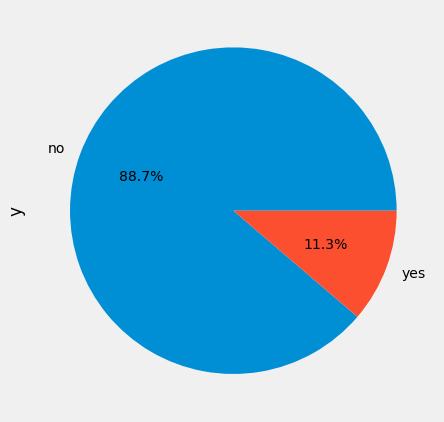

In [10]:
def plot_pie(dataset, target, size=(7,7)):
    return dataset[target].value_counts().plot.pie(autopct = '%1.1f%%', figsize=size)

plot_pie(df, 'y')

# What is the baseline likelihood of term deposits ? This tells us what is the success rate in the absence of ML model

In [11]:
# create a new variable `target` that takes 1 for `yes` else 0
df['target'] = np.where(df['y'].isin(['yes']), 1, 0)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [12]:
df['target'].mean()

0.11265417111780131

### In a no model scenario, out of 100 calls, _11 are taking the term loan_

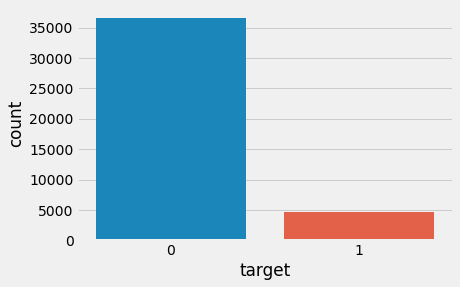

In [13]:
sns.countplot(df['target'])

# Inspecting Categorical variables

# 1. education

In [14]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

education
basic.4y               0.102490
basic.6y               0.082024
basic.9y               0.078246
high.school            0.108355
illiterate             0.222222
professional.course    0.113485
university.degree      0.137245
unknown                0.145003
Name: target, dtype: float64


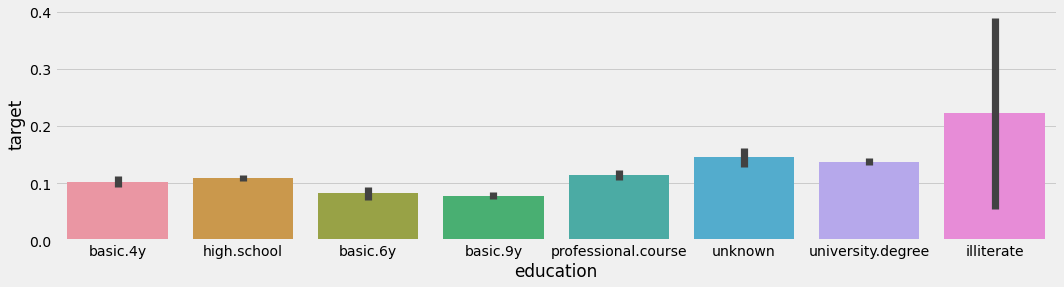

In [15]:
# We will plot the relationship of `education` with `target`
# estimator is mean to show the likelihood of taking up the loan
def barplot_mean(x, y, df, hue=None):
    print(df.groupby(x)[y].mean())
    uniqs = df[x].nunique()
    
    if uniqs > 4:
        plt.figure(figsize=(16,4))
        
    sns.barplot(x=x, y=y, data=df, estimator=np.mean, hue=hue)
    plt.show()

barplot_mean('education', 'target', df)

### `university.degree` and `professional.course` are a little better than the avg. success rate of the data

### `illiterate` and `unknown` is showing high chances of taking a loan (comparing to 0.112..), but we do not want to target such audience in the practical scenario. Always analyze graphs with practical perspective !

In [16]:
# We will group the basic education groups into one
basic_grps = ['basic.4y', 'basic.6y', 'basic.9y']

df['education'] = np.where(df['education'].isin(basic_grps), 'Basic', df['education'])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,target
0,56,housemaid,married,Basic,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,Basic,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


education
Basic                  0.087029
high.school            0.108355
illiterate             0.222222
professional.course    0.113485
university.degree      0.137245
unknown                0.145003
Name: target, dtype: float64


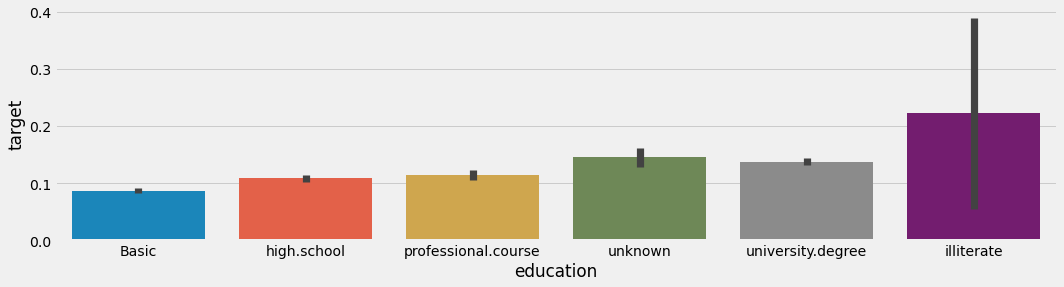

In [17]:
barplot_mean('education', 'target', df)

### we will also go ahead and merge `unknown` and `illiterate` into one

education
Basic                  0.087029
high.school            0.108355
professional.course    0.113485
university.degree      0.137245
unknown                0.145798
Name: target, dtype: float64


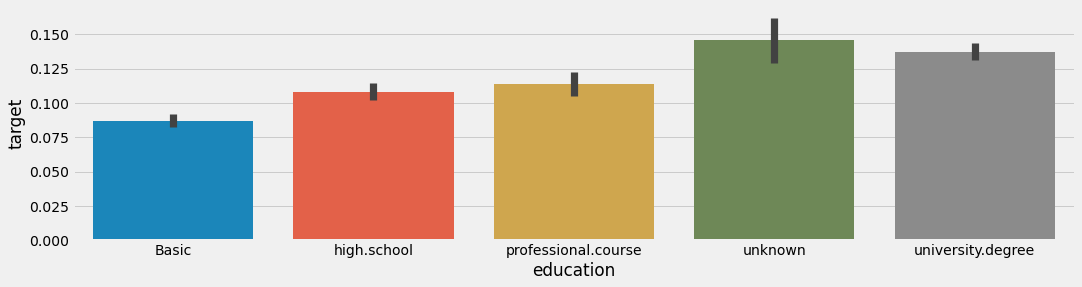

In [18]:
df['education'] = np.where(df['education'].isin(['illiterate']), 'unknown', df['education'])
barplot_mean('education', 'target', df)

### There is no monotonic trend visible that accounts for the discrmination of the target variable. We will be doing similar analysis for other variables as well

# 2. day_of_week

day_of_week
fri    0.108087
mon    0.099483
thu    0.121188
tue    0.117800
wed    0.116671
Name: target, dtype: float64


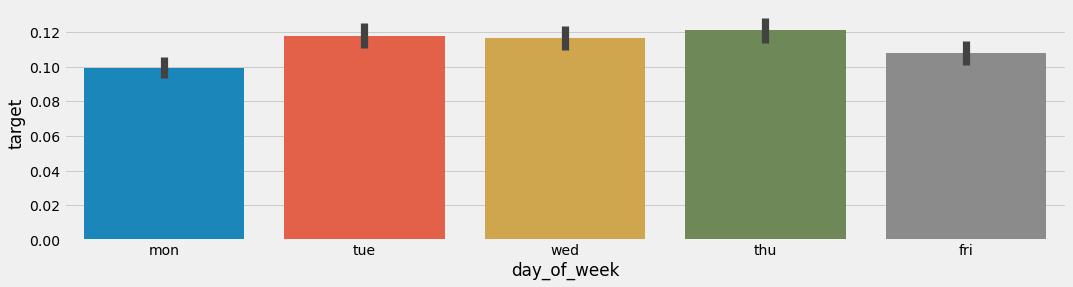

In [19]:
barplot_mean('day_of_week', 'target', df)

### We see there is no significant difference in the trend for different days of the week so we can conclude that this is a weak predictor of the dependent target

# 3. job

job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.142012
unknown          0.112121
Name: target, dtype: float64


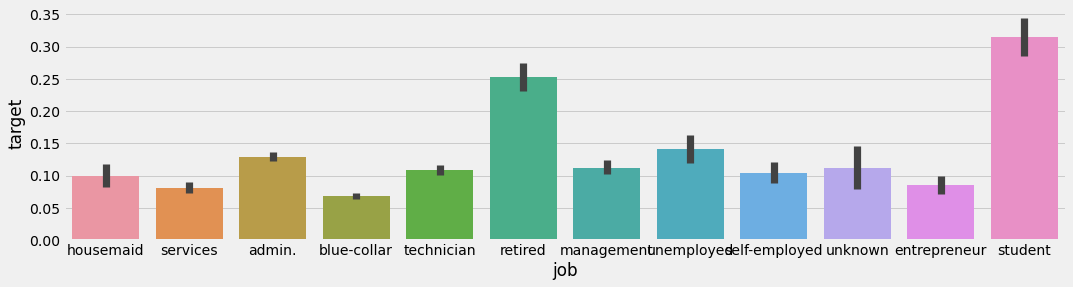

In [20]:
barplot_mean('job', 'target', df)

### It appears as if `student` and `retired` people have very high chances of taking a term loan. We can also go ahead and group `unknown` and `unemployed` into one bucket

job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.134673
Name: target, dtype: float64


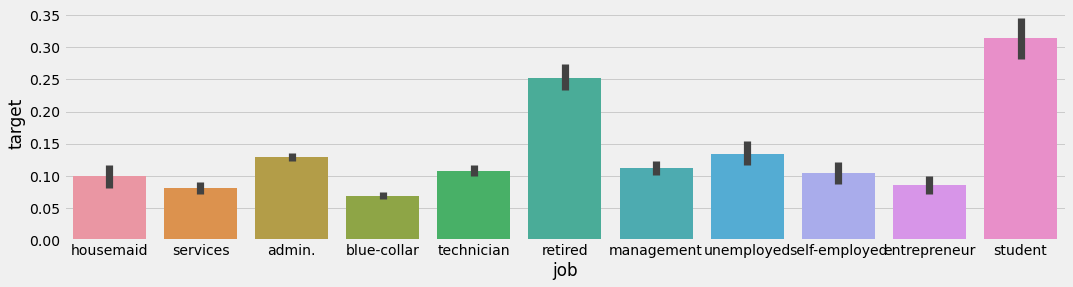

In [21]:
df['job'] = np.where(df['job'].isin(['unknown']), 'unemployed', df['job'])
barplot_mean('job', 'target', df)

# 4.marital_status 

marital
divorced    0.103209
married     0.101573
single      0.140041
unknown     0.150000
Name: target, dtype: float64


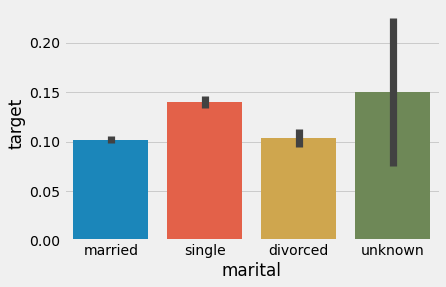

In [22]:
barplot_mean('marital', 'target', df)

### We see there is no significant difference in the trend for different marital status so we can conclude that this is a weak predictor of the dependent target

# 5. default

default
no         0.12879
unknown    0.05153
yes        0.00000
Name: target, dtype: float64


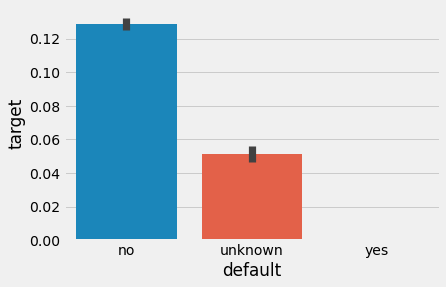

In [23]:
barplot_mean('default', 'target', df)

### We see a trend in case of `default`. A person having `default` is having the mean as `0`. We will inspect this by doing the sum

In [24]:
print(df.groupby('default')['target'].sum())
print("*"*30)
# if we look at the count - we do have 3 cases of people who have `defaulted`
print(df.groupby('default')['target'].count())

# But we do have cases of `unknown`. 
# We can go ahead and group them in `yes` 
# because we are not sure which category they belong to

default
no         4197
unknown     443
yes           0
Name: target, dtype: int64
******************************
default
no         32588
unknown     8597
yes            3
Name: target, dtype: int64


default
no     0.128790
yes    0.051512
Name: target, dtype: float64


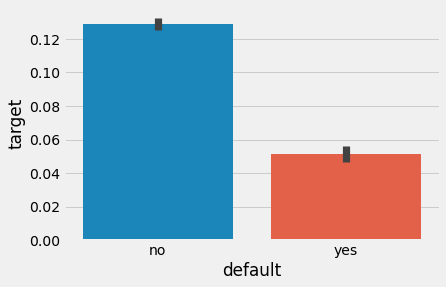

In [25]:
df['default'] = np.where(df['default'].isin(['unknown']), 'yes', df['default'])
barplot_mean('default', 'target', df)

### This is a very good variable to design the audience which can be utilised later since it is able to discriminate the dependent target variable. 

### Note: As a predictor, this is also weak because the likelihood of a person with `no default` buying a term loan is only `12.87 %` 

# 6. housing

housing
no         0.108796
unknown    0.108081
yes        0.116194
Name: target, dtype: float64


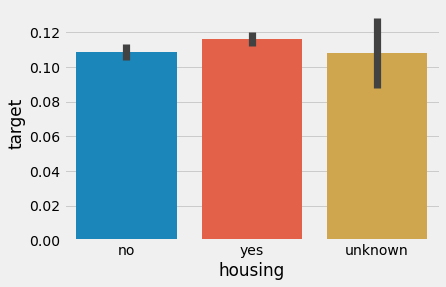

In [26]:
barplot_mean('housing', 'target', df)

### We see there is no significant difference in the trend for different housing loan status so we can conclude that this is a weak predictor of the dependent target

# 7. loan

loan
no         0.113402
unknown    0.108081
yes        0.109315
Name: target, dtype: float64


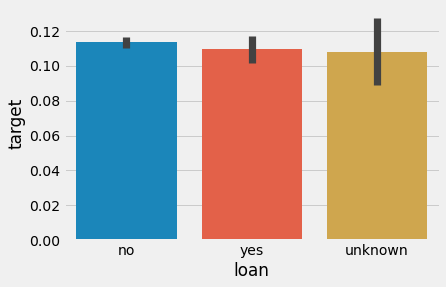

In [27]:
barplot_mean('loan', 'target', df)

### We see there is no significant difference in the trend for different personal loan status so we can conclude that this is a weak predictor of the dependent target

# 8. contact

contact
cellular     0.147376
telephone    0.052313
Name: target, dtype: float64


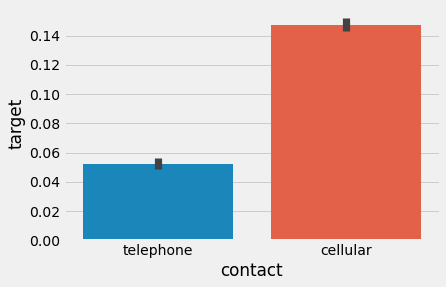

In [28]:
barplot_mean('contact', 'target', df)

### This is a very good variable to design the audience which can be utilised later since it is able to discriminate the dependent target variable.

### Note: We see that there is a positive slope in the trend

# 9. month

month
apr    0.204787
aug    0.106021
dec    0.489011
jul    0.090466
jun    0.105115
mar    0.505495
may    0.064347
nov    0.101439
oct    0.438719
sep    0.449123
Name: target, dtype: float64


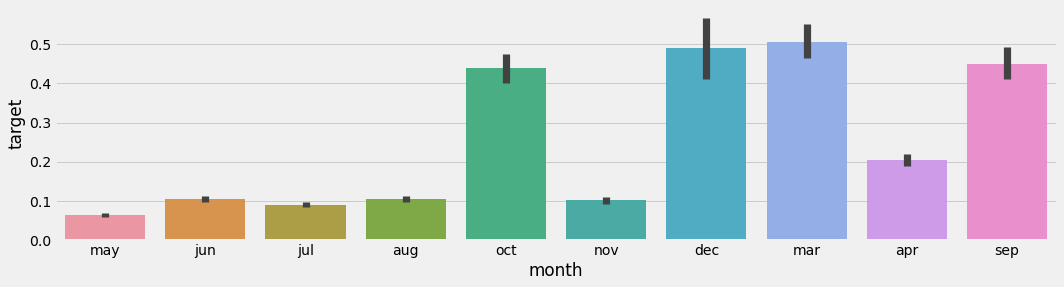

In [29]:
barplot_mean('month', 'target', df)

### We are not able to see any monotonic trend here. One way to resolve this is to see if grouping them into quarters will help us find any signals.

In [30]:
qtr1 = ['jan', 'feb', 'mar']
qtr2 = ['apr', 'may', 'jun']
qtr3 = ['jul', 'aug', 'sep']
qtr4 = ['oct', 'nov', 'dec']

df['qtr'] = np.where(df['month'].isin(qtr1), 'Q1', 
                                       np.where(df['month'].isin(qtr2), 'Q2', 
                                       np.where(df['month'].isin(qtr3), 'Q3',
                                       np.where(df['month'].isin(qtr4), 'Q4', 0)
                                       )))
df['qtr'].value_counts()

Q2    21719
Q3    13922
Q4     5001
Q1      546
Name: qtr, dtype: int64

### `Q1` has the least amount of observation while `Q2` is the majority

### We will study the behavior of the target variable with respect to quarter

qtr
Q1    0.505495
Q2    0.091349
Q3    0.112053
Q4    0.163967
Name: target, dtype: float64


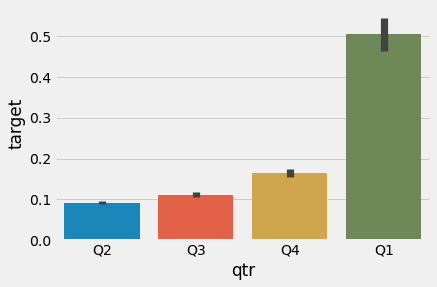

In [31]:
barplot_mean('qtr', 'target', df)

### `Q1` is showing a likelihood of `50 %`. That is huge ! Of all the customers called in the start of the year, every second called customer will end up buying a term loan

### While building our strategy, we can inform the marketing team to invest their major efforts in the beginning of the year to get the best results.

### Arriving into `Q2`, there is a sharp decline in the interest of the customers. These may be the dry months for the marketing team. This can also support us building an effective strategy accordingly.

## Let us try combining `qtr` and other variable together.

qtr
Q1    0.505495
Q2    0.091349
Q3    0.112053
Q4    0.163967
Name: target, dtype: float64


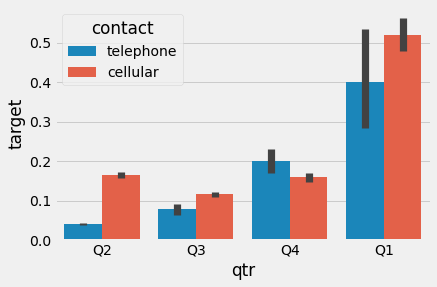

In [32]:
barplot_mean('qtr', 'target', df, hue='contact')

### We have an interesting insight here ! `Q2` has a likelihood of `0.9%` but if you target the customers with `contact="cellular"`, your chances are very much better than `0.9%`

### We see an that `contact="cellular"` is leading most of the quarters except `Q4`. There might be some external factors at play here.

### We will try to look at the profiles of cellular customer across the quarters and their likelihood of purchasing the term loan

In [33]:
df[df['contact'] == "cellular"].groupby('qtr')['target'].mean()

# avg. likelihood across qtr
# Q1    0.505495
# Q2    0.091349
# Q3    0.112053
# Q4    0.163967

qtr
Q1    0.518519
Q2    0.165775
Q3    0.115961
Q4    0.158842
Name: target, dtype: float64

# 10. poutcome

poutcome
failure        0.142286
nonexistent    0.088322
success        0.651129
Name: target, dtype: float64


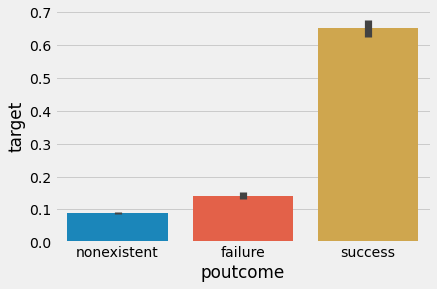

In [34]:
barplot_mean('poutcome', 'target', df)

### This is a very good variable to design the audience which can be utilised later since it is able to discriminate the dependent target variable.
### Note: Customers who were a success earlier are `5 times` mre likely to buy the term loan than a person who was a failure

### We will also merge `nonexistent` and `failure` together

poutcome
0    0.094085
1    0.651129
Name: target, dtype: float64


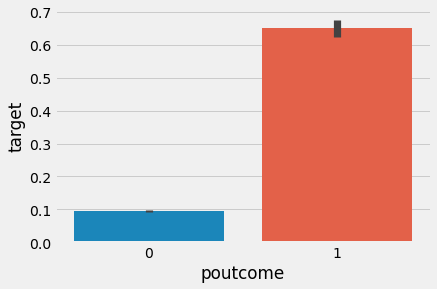

In [35]:
df['poutcome'] = np.where(df['poutcome'].isin(['nonexistent', 'failure']), 0, 1)
barplot_mean('poutcome', 'target', df)

qtr
Q1    0.505495
Q2    0.091349
Q3    0.112053
Q4    0.163967
Name: target, dtype: float64


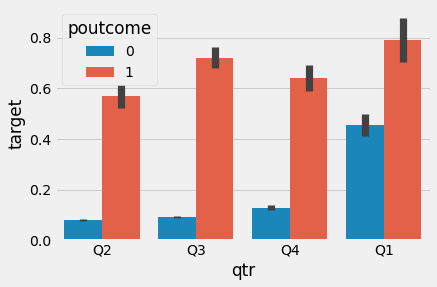

In [36]:
barplot_mean('qtr', 'target', df, hue='poutcome')

In [37]:
df[df['poutcome'] == 1].groupby('qtr')['target'].mean()

# avg. likelihood across qtr
# Q1    0.505495
# Q2    0.091349
# Q3    0.112053
# Q4    0.163967

qtr
Q1    0.790123
Q2    0.571134
Q3    0.720174
Q4    0.638728
Name: target, dtype: float64

### We observe that when we combine `poutcome` and `quarter`. We will be able to build profiles that have 5-8 times better likelihood of success when compared to the no-model scenario. `Q3` has better chances than `Q4`

### The idea is as we have seen above that `Q2` and `Q3` are not favorable in comparison to `Q1` and `Q4`, but in the practical scenario we can't stop the team to run campaigns in `Q2` and `Q3`. So we are adding surrogate variables to boost their performance.

### Hope this notebook is useful 😄

# working with continous variables

### we will convert continuos variables into categories by binning them into ranks

# 11. age

In [38]:
df['age_rank'] = pd.qcut(df['age'].rank(method='first').values, 5, duplicates='drop').codes+1
df['age_rank'].value_counts()

# we have divided age into 5 ranks thery distributing 20% data in each rank
# we can now see if there is any trend with respect to age on target

5    8238
3    8238
1    8238
4    8237
2    8237
Name: age_rank, dtype: int64

age_rank
1    0.143846
2    0.107321
3    0.084365
4    0.081947
5    0.145788
Name: target, dtype: float64


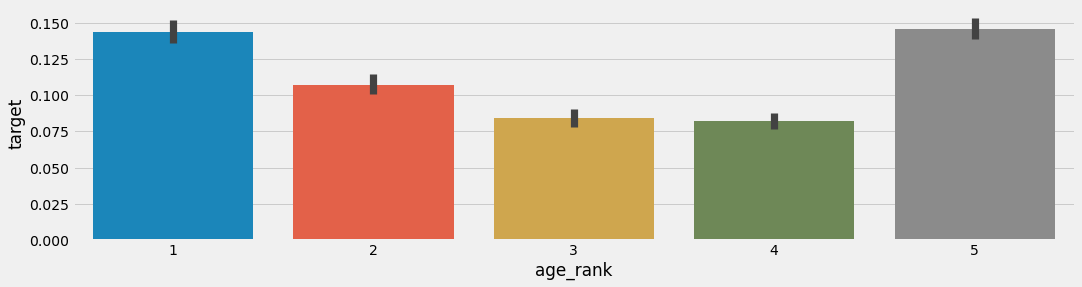

In [39]:
barplot_mean('age_rank', 'target', df)

### we see that we have `U-shaped` curve. This variable might not help us discriminate the dependent variable. The prediction will be impacted

### let us try to combine this with `qtr`

age_rank
1    0.143846
2    0.107321
3    0.084365
4    0.081947
5    0.145788
Name: target, dtype: float64


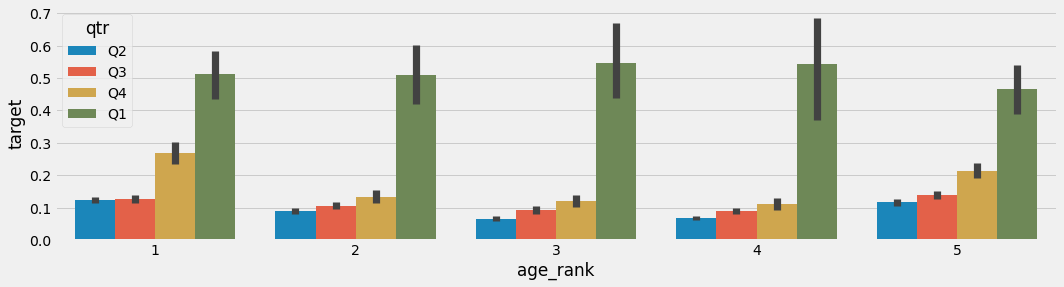

In [40]:
barplot_mean('age_rank', 'target', df, hue='qtr')

### As we can infer from this graph, `Q1` seems to stand out everytime as evident earlier since it has a likelihood of `50 %`

# 12. duration

In [41]:
df['duration_rank'] = pd.qcut(df['duration'].rank(method='first').values, 5, duplicates='drop').codes+1
df['duration_rank'].value_counts()

5    8238
3    8238
1    8238
4    8237
2    8237
Name: duration_rank, dtype: int64

duration_rank
1    0.004613
2    0.032051
3    0.072833
4    0.123831
5    0.329934
Name: target, dtype: float64


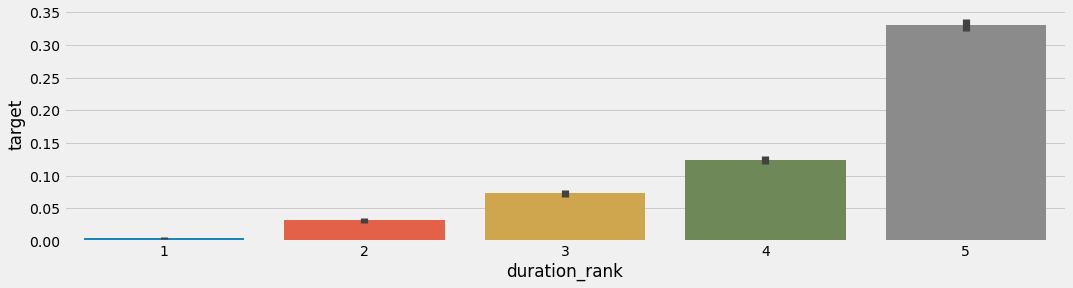

In [42]:
barplot_mean('duration_rank', 'target', df)

### From the perspective of discrimination, we see a very strong positive trend. As the duration is increasing, the chances of buying the term loan is almost doubling. This will be an excellent predictor while using in the model

### But we have to be cautious of using `duration` because by definition `duration` is last contact duration, in seconds and we do not know the duration until a call is made.

### so we will move ahead

# 13. campaign

In [43]:
df['campaign_rank'] = pd.qcut(df['campaign'].rank(method='first').values, 5, duplicates='drop').codes+1
df['campaign_rank'].value_counts()

5    8238
3    8238
1    8238
4    8237
2    8237
Name: campaign_rank, dtype: int64

campaign_rank
1    0.043700
2    0.161345
3    0.119325
4    0.140342
5    0.098568
Name: target, dtype: float64


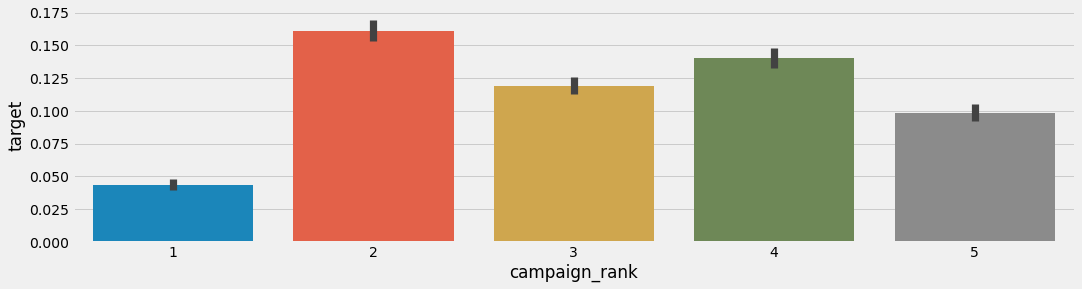

In [44]:
barplot_mean('campaign_rank', 'target', df)

### this plot is showing a non-linear trend. Let us look at what kind of value does `campaign` takes ?

In [45]:
print(df.groupby('campaign_rank')['campaign'].min())
print("*"*30)
print(df.groupby('campaign_rank')['campaign'].mean())
print("*"*30)
print(df.groupby('campaign_rank')['campaign'].max())

campaign_rank
1    1
2    1
3    1
4    2
5    3
Name: campaign, dtype: int64
******************************
campaign_rank
1    1.000000
2    1.000000
3    1.858339
4    2.575209
5    6.404224
Name: campaign, dtype: float64
******************************
campaign_rank
1     1
2     1
3     2
4     3
5    56
Name: campaign, dtype: int64


# 14. pdays

In [46]:
df['pdays_rank'] = pd.qcut(df['pdays'].rank(method='first').values, 5, duplicates='drop').codes+1
df['pdays_rank'].value_counts()

5    8238
3    8238
1    8238
4    8237
2    8237
Name: pdays_rank, dtype: int64

pdays_rank
1    0.141418
2    0.049168
3    0.058388
4    0.106835
5    0.207453
Name: target, dtype: float64


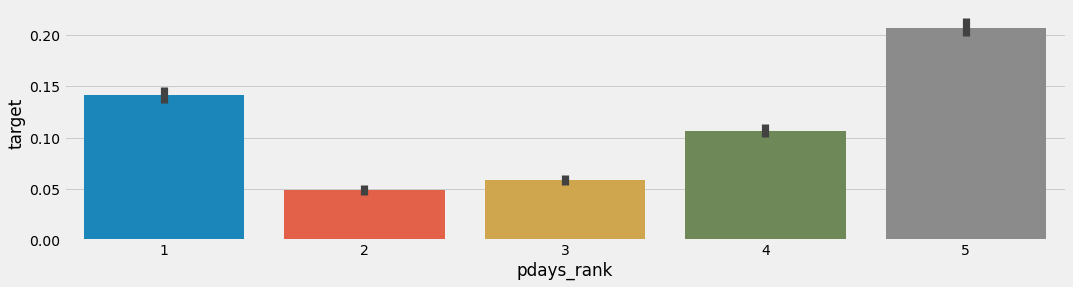

In [47]:
barplot_mean('pdays_rank', 'target', df)

In [48]:
print(df.groupby('pdays_rank')['pdays'].min())
print("*"*30)
print(df.groupby('pdays_rank')['pdays'].mean())
print("*"*30)
print(df.groupby('pdays_rank')['pdays'].max())

pdays_rank
1      0
2    999
3    999
4    999
5    999
Name: pdays, dtype: int64
******************************
pdays_rank
1    816.386137
2    999.000000
3    999.000000
4    999.000000
5    999.000000
Name: pdays, dtype: float64
******************************
pdays_rank
1    999
2    999
3    999
4    999
5    999
Name: pdays, dtype: int64


# 15. previous

In [49]:
df['prev_rank'] = pd.qcut(df['previous'].rank(method='first').values, 5, duplicates='drop').codes+1
df['prev_rank'].value_counts()

5    8238
3    8238
1    8238
4    8237
2    8237
Name: prev_rank, dtype: int64

prev_rank
1    0.031440
2    0.054267
3    0.058267
4    0.117154
5    0.302136
Name: target, dtype: float64


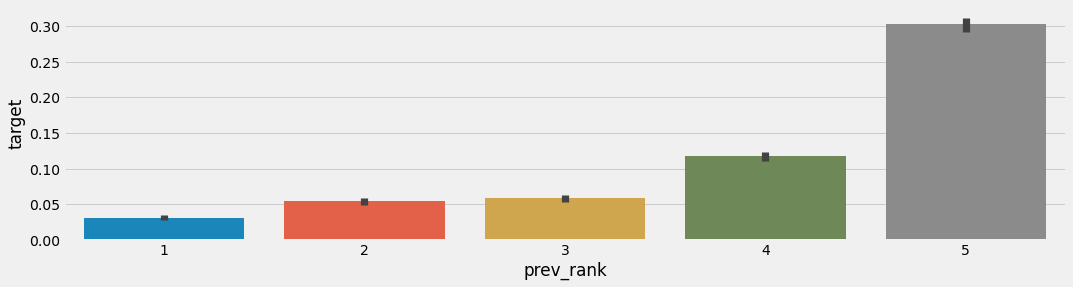

In [50]:
barplot_mean('prev_rank', 'target', df)

### This is a very good variable to design the audience which can be utilised later since it is able to discriminate the dependent target variable.

qtr
Q1    0.505495
Q2    0.091349
Q3    0.112053
Q4    0.163967
Name: target, dtype: float64


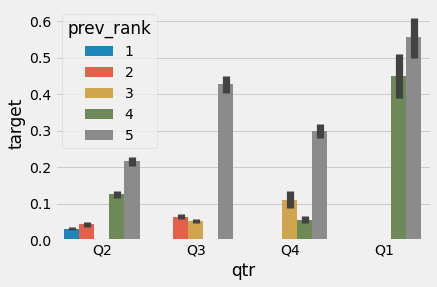

In [51]:
barplot_mean('qtr', 'target', df, hue='prev_rank')

# 16. emp.var.rate

emp.var.rate_rank
1    0.230396
2    0.193881
3    0.032289
4    0.052568
5    0.054139
Name: target, dtype: float64


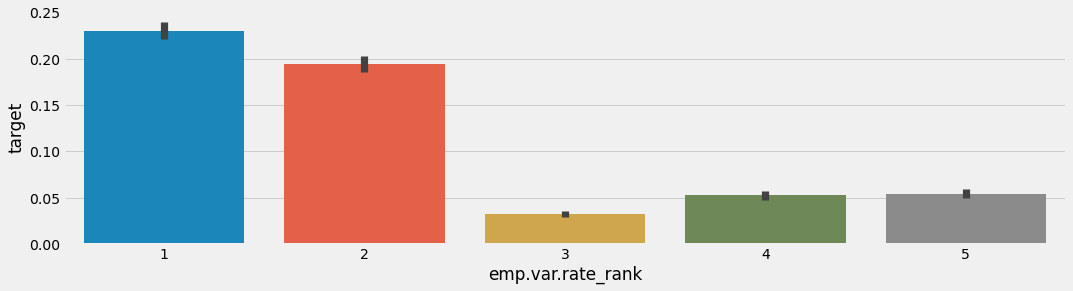

In [52]:
df['emp.var.rate_rank'] = pd.qcut(df['emp.var.rate'].rank(method='first').values, 5, duplicates='drop').codes+1
barplot_mean('emp.var.rate_rank', 'target', df)

### This can behave as a good predictor in case of a decision tree since the lower ranks are capturing more and higher ranks are capturing less

# 17. cons.price.idx

cons.price.idx_rank
1    0.184511
2    0.136215
3    0.085700
4    0.038121
5    0.118718
Name: target, dtype: float64


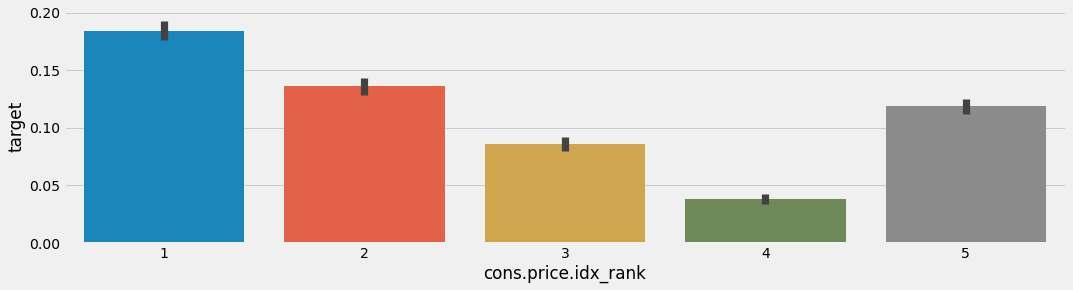

In [53]:
df['cons.price.idx_rank'] = pd.qcut(df['cons.price.idx'].rank(method='first').values, 5, duplicates='drop').codes+1
barplot_mean('cons.price.idx_rank', 'target', df)

### We observe a strong slope from rank 1 to 4

# 18. cons.conf.idx

cons.conf.idx_rank
1    0.137776
2    0.068836
3    0.102088
4    0.082919
5    0.171644
Name: target, dtype: float64


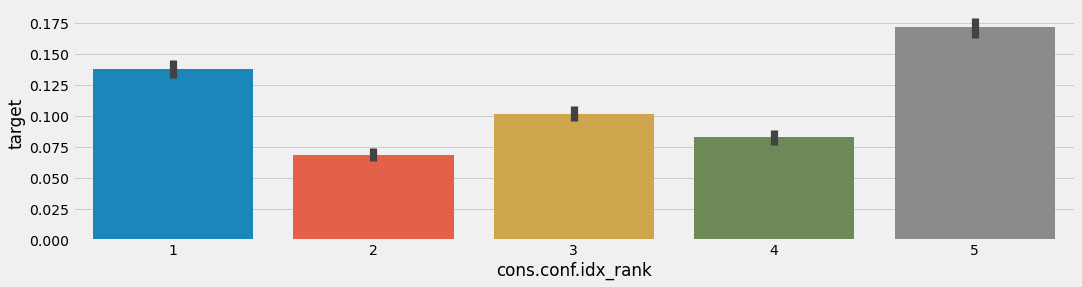

In [54]:
df['cons.conf.idx_rank'] = pd.qcut(df['cons.conf.idx'].rank(method='first').values, 5, duplicates='drop').codes+1
barplot_mean('cons.conf.idx_rank', 'target', df)

### We observe that this is a very weak predictor

# 19.euribor3m

euribor3m_rank
1    0.308813
2    0.110113
3    0.034839
4    0.054389
5    0.055110
Name: target, dtype: float64


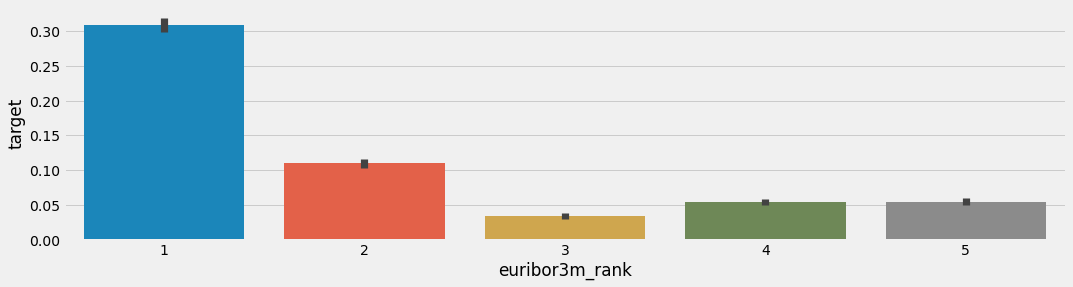

In [55]:
df['euribor3m_rank'] = pd.qcut(df['euribor3m'].rank(method='first').values, 5, duplicates='drop').codes+1
barplot_mean('euribor3m_rank', 'target', df)

### We observe that this can used in a decision tree to make audiences

# 20.nr.employed

nr.employed_rank
1    0.346443
2    0.063008
3    0.047706
4    0.051961
5    0.054139
Name: target, dtype: float64


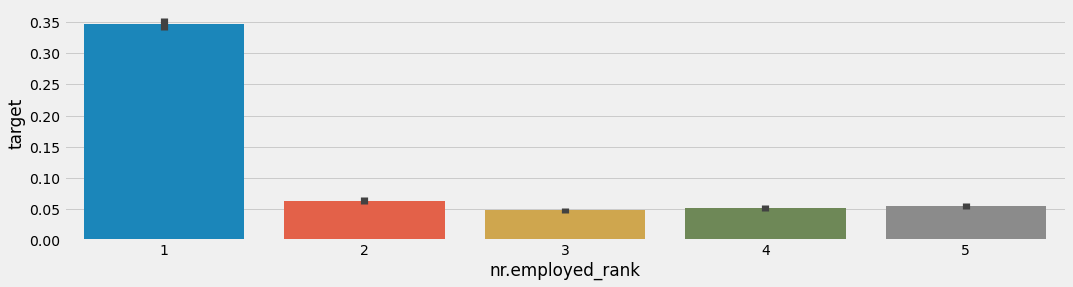

In [56]:
df['nr.employed_rank'] = pd.qcut(df['nr.employed'].rank(method='first').values, 5, duplicates='drop').codes+1
barplot_mean('nr.employed_rank', 'target', df)

### We observe that this can used in a decision tree to make audiences. Let us kbreak it into 10 ranks instead of 5

nr.employed_rank
1     0.467346
2     0.225540
3     0.070163
4     0.055852
5     0.033261
6     0.062151
7     0.042496
8     0.061423
9     0.058995
10    0.049284
Name: target, dtype: float64


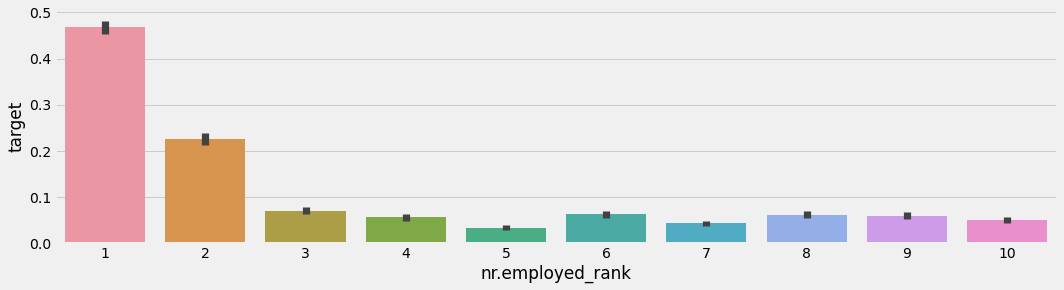

In [57]:
df['nr.employed_rank'] = pd.qcut(df['nr.employed'].rank(method='first').values, 10, duplicates='drop').codes+1
barplot_mean('nr.employed_rank', 'target', df)

### We can see the behavior that rank 1 has now higher likelihood and the trend is going in a decreasing fashion. We can transform this to add a discrimatory slope by merging everything after the 3rd rank with itself

In [58]:
df['nr.employed_rank'] = np.where(df['nr.employed_rank'].isin(['1']), 'A', 
                                       np.where(df['nr.employed_rank'].isin(['2']), 'B', 'C'))
                                                                            
df['nr.employed_rank'].value_counts()

C    32950
A     4119
B     4119
Name: nr.employed_rank, dtype: int64

nr.employed_rank
A    0.467346
B    0.225540
C    0.054203
Name: target, dtype: float64


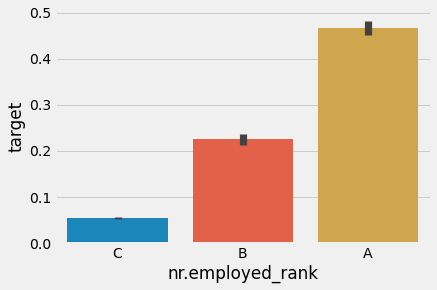

In [59]:
barplot_mean('nr.employed_rank', 'target', df)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41188 non-null  int64  
 1   job                  41188 non-null  object 
 2   marital              41188 non-null  object 
 3   education            41188 non-null  object 
 4   default              41188 non-null  object 
 5   housing              41188 non-null  object 
 6   loan                 41188 non-null  object 
 7   contact              41188 non-null  object 
 8   month                41188 non-null  object 
 9   day_of_week          41188 non-null  object 
 10  duration             41188 non-null  int64  
 11  campaign             41188 non-null  int64  
 12  pdays                41188 non-null  int64  
 13  previous             41188 non-null  int64  
 14  poutcome             41188 non-null  int64  
 15  emp.var.rate         41188 non-null 

# Modelling

In [61]:
# We are not considering education, job, day_of_week, housing, loan
cols_cat = ['default', 'contact', 'poutcome', 'nr.employed_rank']

# We are not considering age, duration, cons.conf.idx 
cols_num = ['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m'] #, 'duration']

# NOTE: duration is added to improve the ROC score

In [62]:
# dummy encoding categorical variable
# ref: https://stackoverflow.com/questions/36631163/what-are-the-pros-and-cons-between-get-dummies-pandas-and-onehotencoder-sciki
cols_cat_dummy = pd.get_dummies(df[cols_cat], drop_first=True)
cols_cat_dummy.head()

,poutcome,default_yes,contact_telephone,nr.employed_rank_B,nr.employed_rank_C
0,0,0,1,0,1
1,0,1,1,0,1
2,0,0,1,0,1
3,0,0,1,0,1
4,0,0,1,0,1


In [63]:
X_all = pd.concat([df[cols_num], cols_cat_dummy], axis=1, join='inner')
X_all.head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,poutcome,default_yes,contact_telephone,nr.employed_rank_B,nr.employed_rank_C
0,1,999,0,1.1,93.994,4.857,0,0,1,0,1
1,1,999,0,1.1,93.994,4.857,0,1,1,0,1
2,1,999,0,1.1,93.994,4.857,0,0,1,0,1
3,1,999,0,1.1,93.994,4.857,0,0,1,0,1
4,1,999,0,1.1,93.994,4.857,0,0,1,0,1


In [64]:
# Assigning X and Y
X = X_all
y = df['target']

# Splitting the data set

In [65]:
# Train-Val split 75-25
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=101, test_size=0.30)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(28831, 11) (12357, 11) (28831,) (12357,)


In [66]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

# TODO: Do a grid search to explore best parameters
dt = DecisionTreeClassifier(criterion="gini", random_state=101, max_depth=7, min_samples_leaf=5)
dt.fit(X_train, y_train)

rf_1000 = RandomForestClassifier(n_estimators=1000, random_state=101, criterion="gini", max_features="auto", max_depth=2)
rf_1000.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=1000, random_state=101)

# Prediction

In [67]:
y_pred = lr.predict(X_val)
print("Accuracy of logistic regression on test set {:.2f}".format(lr.score(X_val, y_val)))

Accuracy of logistic regression on test set 0.90


In [68]:
y_pred_tree = dt.predict(X_val)
print("Accuracy of decision tree on test set {:.2f}".format(dt.score(X_val, y_val)))

Accuracy of decision tree on test set 0.90


In [69]:
y_pred_rf = rf_1000.predict(X_val)
print("Accuracy of random forest on test set {:.2f}".format(rf_1000.score(X_val, y_val)))

Accuracy of random forest on test set 0.90


In [70]:
rf_1000_train_score = rf_1000.score(X_train, y_train)
rf_1000_test_score = rf_1000.score(X_val, y_val)


print("Training Score:", rf_200_train_score)
print("Test Score:", rf_200_test_score)

NameError: name 'rf_200_train_score' is not defined

# Confusion Matrices -- Classification Reports

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10978
           1       0.72      0.19      0.30      1379

    accuracy                           0.90     12357
   macro avg       0.81      0.59      0.62     12357
weighted avg       0.89      0.90      0.87     12357



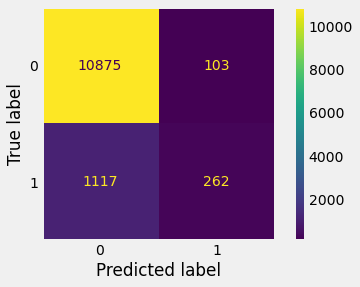

In [71]:
sns.set_style({'axes.grid' : False})
# logistic regression
plot_confusion_matrix(lr, X_val, y_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10978
           1       0.65      0.25      0.36      1379

    accuracy                           0.90     12357
   macro avg       0.78      0.61      0.65     12357
weighted avg       0.88      0.90      0.88     12357



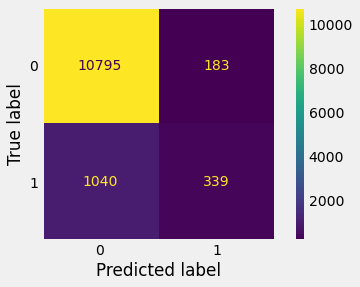

In [72]:
# decision tree
print(classification_report(y_val, y_pred_tree))
plot_confusion_matrix(dt, X_val, y_val)

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     10978
           1       0.74      0.16      0.26      1379

    accuracy                           0.90     12357
   macro avg       0.82      0.57      0.60     12357
weighted avg       0.89      0.90      0.87     12357



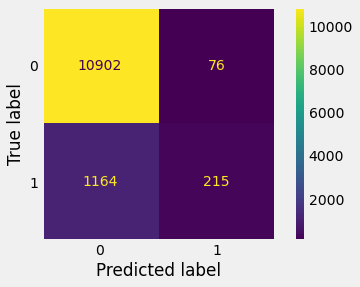

In [73]:
# random forest
print(classification_report(y_val, y_pred_rf))
plot_confusion_matrix(rf_1000, X_val, y_val)

# Plotting the ROC curves

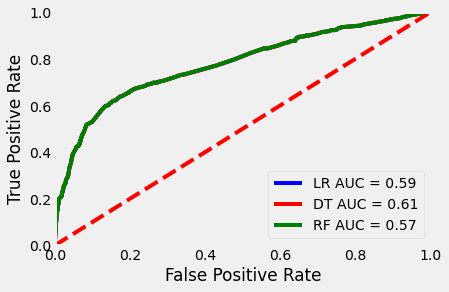

In [74]:
lr_roc_auc = roc_auc_score(y_val, lr.predict(X_val))
dt_roc_auc = roc_auc_score(y_val, dt.predict(X_val))
rf_roc_auc = roc_auc_score(y_val, rf_1000.predict(X_val))

fpr, tpr, thresholds = roc_curve(y_val, lr.predict_proba(X_val)[:, 1])
fpr, tpr, thresholds = roc_curve(y_val, dt.predict_proba(X_val)[:, 1])
fpr, tpr, thresholds = roc_curve(y_val, rf_1000.predict_proba(X_val)[:, 1])

plt.figure()

plt.plot(fpr, tpr, 'b', label = 'LR AUC = %0.2f' % lr_roc_auc)
plt.plot(fpr, tpr, 'r', label = 'DT AUC = %0.2f' % dt_roc_auc)
plt.plot(fpr, tpr, 'g', label = 'RF AUC = %0.2f' % rf_roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('LR DT RF ROC Curve')
plt.show()



In [75]:
### The score is coming in the range of late 50s, lets try to improve the model by incorporating `duration`

### After using `duration`, we are able to get the score upto `0.77` for decision tree

# Making sense from the model - Lorenz curve

In [76]:
# Ranking the probabilities from the logistic regression model

y_pred_prob = lr.predict_proba(X)[:,1]
df['y_pred_P'] = pd.DataFrame(y_pred_prob)
df['P_rank'] = pd.qcut(df['y_pred_P'].rank(method='first').values, 10, duplicates='drop').codes+1
df.groupby('P_rank')['target'].mean()

# The highest rank has a likelihood of 48.28 percent (~ 4.3 times better than the average)

P_rank
1     0.031804
2     0.054625
3     0.041515
4     0.035697
5     0.054625
6     0.060694
7     0.058524
8     0.089342
9     0.216800
10    0.482884
Name: target, dtype: float64

In [77]:
# Ranking the probabilities from the logistic regression model

y_pred_prob_dtree = dt.predict_proba(X)[:,1]
df['y_pred_P_dtree'] = pd.DataFrame(y_pred_prob_dtree)
df['P_rank_dtree'] = pd.qcut(df['y_pred_P_dtree'].rank(method='first').values, 10, duplicates='drop').codes+1
df.groupby('P_rank_dtree')['target'].mean()

# The highest rank has a likelihood of 51.56 percent (~ 4.6 times better than the average)

P_rank_dtree
1     0.026948
2     0.031318
3     0.040544
4     0.052695
5     0.066278
6     0.058024
7     0.055367
8     0.079388
9     0.200291
10    0.515659
Name: target, dtype: float64

### From a discrimination point of view, decision tree is able to give a better likelihood

In [78]:
df.to_csv('telemarketing_model_scored_file.csv')